<a href="https://colab.research.google.com/github/Purushotham011/Neural-Networks-and-DL/blob/main/Exp_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Required Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

##Load the Dataset

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Normalize the pixel values to between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert the labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


##Creating the Model

In [3]:
model = models.Sequential()

# Convolutional Layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolution Layer 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatter the output before feeding to the dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Output layer for 10 classes

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the model

In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

##Fit the Model

In [5]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 84ms/step - accuracy: 0.3094 - loss: 1.8564 - val_accuracy: 0.4968 - val_loss: 1.3869
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 91ms/step - accuracy: 0.5208 - loss: 1.3364 - val_accuracy: 0.5817 - val_loss: 1.2037
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 84ms/step - accuracy: 0.5921 - loss: 1.1588 - val_accuracy: 0.6198 - val_loss: 1.0804
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.6320 - loss: 1.0403 - val_accuracy: 0.6359 - val_loss: 1.0346
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 84ms/step - accuracy: 0.6618 - loss: 0.9577 - val_accuracy: 0.6387 - val_loss: 1.0242
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.6812 - loss: 0.8985 - val_accuracy: 0.6573 - val_loss: 0.9897
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 83ms/step - accuracy: 0.7054 - loss: 0.8394 - val_accuracy: 0.6657 - val_loss: 0.9548
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.7202 - loss: 0.7932 - 

## Calculate Accuracy

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6798 - loss: 0.9283
Test accuracy: 0.680400013923645


##Visual Representation

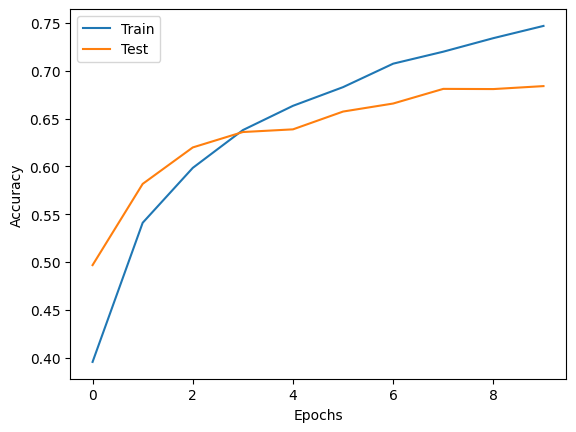

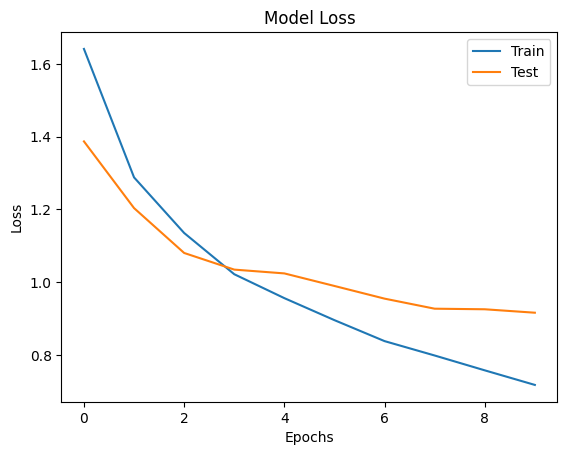

In [7]:
# Plot training and validation accuracy values
import matplotlib.pyplot as plt
# plt.figure(figsize = (12,6))
#plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & Validation loss values
#plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

##Making Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


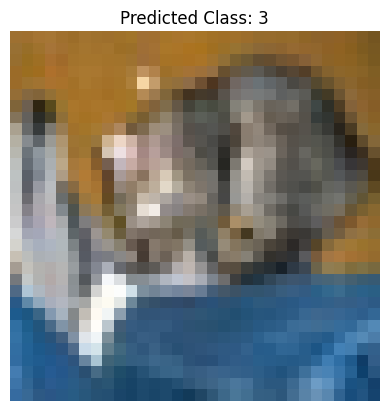

In [8]:
# Make Predictions on test data
predictions = model.predict(x_test)

# Display the first image and its predicted class
plt.imshow(x_test[0])
plt.title(f'Predicted Class: {predictions[0].argmax()}')
plt.axis('off')
plt.show()